# k-Nearest Neighbour Regression

As discussed in class, the k-Nearest Neighbours method works by exploiting an existing database of _labelled_ observations. To predict the (unknown) value of a new observation, we embed it in the space of the existing observations measure the distance between the new instance and the existing observations, and then use the labels of the $k$ nearest observations to determine the prediction. In the context of regression, the prediction is the mean of the $k$ nearest labels.

To work with k-Nearest Neighbours in Python, we an make use of the existing [numpy](https://numpy.org/) and [scikit-learn](https://scikit-learn.org/) libraries. Let's start by importing them (and a [matplotlib](https://matplotlib.org/) for some plotting of the results):

In [2]:
import numpy as np

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot as plt

## Our "Training" Data

We'll also need some data to act as the historical observations from our problem. For this example, we'll just make some up (but usually, you'd be given this data). In this case, we (the people doing the work) actually know the underlying function $f(X)$, but from the modelling perspective this function is not known:

In [3]:
def f(X):
    return (X[:, 0] + 0.5)**2 + 0.25 * np.sin(4 * np.pi * X[:, 0])

Now, we will use this function to generate some training data (it is still called training data, even though no real training takes place in k-Nearest Neighbours):

In [4]:
rng = np.random.default_rng(1234) ## notice the fixed seed for reproducability

X_train = rng.uniform(-1, 1, size=50).reshape((-1, 1))
y_train = f(X_train) + rng.normal(0, 0.1, size=len(X_train))

## we'll also generate some "test" data use this to test the shape of our learned function shortly
X = np.linspace(-1, 1, 500).reshape((-1, 1))
y = f(X)

Let's take a look at the data (and underlying generating function) before moving on to modelling:

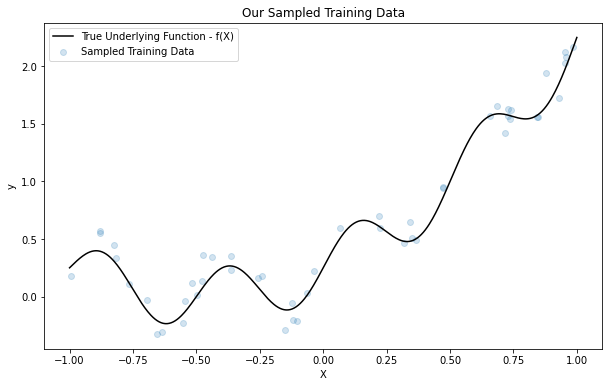

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, alpha=0.2, label='Sampled Training Data')
plt.plot(X, y, color='black', label='True Underlying Function - f(X)')
plt.title('Our Sampled Training Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Applying k-Nearest Neighbours

Now that we have a training set of data, we can move onto modelling. We do this by instantiating a KNeighboursRegressor model, calling the fit function, and then making predictions from the resulting model with the predict function. When building a k-Nearest Neighbours model, we need to specify the size of the neighbourhood of similar observations ($k$) - here we will examine this process for a range of $k$ values:

In [ ]:
fix, ax = plt.subplots(2, 3, figsize=(16,10))
for (i, k) in enumerate([ 1, 3, 5, 10, 20, 50 ]):
    mdl = KNeighborsRegressor(n_neighbors=k)
    mdl.fit(X_train, y_train)

    loss = mean_squared_error(f(X), mdl.predict(X))
    print(loss)
    r = i // 3
    c = i % 3
    ax[r, c].scatter(X_train, y_train, alpha=0.2, label='Sampled Training Data')
    ax[r, c].plot(X, y, color='black', label='True Underlying Function - f(X)')
    ax[r, c].plot(X, mdl.predict(X), color='#ce2227', label="Estimated Function - kNN, k={}".format(k))
    ax[r, c].set_title("kNN Performance, MSE={}".format(np.round(loss, 2)))
    ax[r, c].set_xlabel('X')
    ax[r, c].set_ylabel('y')
    ax[r, c].legend()

plt.show();

In each plot, the red line represents the model that was extracted from the training data by the algorithm for a given $k$ value. Notice that when $k=1$, the resulting model is quite sensitive to noise in the training data (it captures a lot of this noise in the model and so it regularly deviates from the true underlying function). As $k$ is increased, the resulting models become less sensitive to the noise in the training data. However, there is a balancing act here: as $k$ becomes very large, k-Nearest Neighbours starts to lose some of the detail in the underlying function. At its extreme ($k$ equals the size of the training data), the algorithm produces a model that is equivalent to the mean of the training data for all cases (hence the stright line).

## Examining the effect of $k$
The main hyperparameter for k-Nearest Neighbours (indeed, the ONLY hyperparameter for the basic version of k-Nearest Neighbours) is the neighbourhood size $k$. In the previous step, we looked at an arbitrary set of possible values for $k$ - let's now be a little more rigorous and examine the performance of k-Nearest Neighbours over a more thorough sweep of values of $k$:

In [ ]:
all_k = np.arange(1, 51) ## all the possible values of k - 1 through to the size of the training data set
loss = []
for k in all_k:
    mdl = KNeighborsRegressor(n_neighbors=k)
    mdl.fit(X_train, y_train)
    loss.append(mean_squared_error(y, mdl.predict(X)))

## Let's find the example with the lowest loss
best_k = np.argmin(loss)

Finally, we can plot the loss against the neighbourhood size to see how $k$ influences the behaviour of the algorithm and the resulting model:

In [ ]:
## Finally, let's look at the range of losses we can expect for different neighbourhood sizes
plt.figure(figsize=(10,6))
plt.plot(all_k, loss)
plt.scatter(all_k[best_k], loss[best_k], color='#ce2227', label="Lowest Loss, k={}".format(all_k[best_k]))
plt.xlabel('k')
plt.ylabel('MSE Loss')
plt.title('kNN Performance for Neighbourhood Size')
plt.legend()
plt.show();

In this result, we can see that (for this sample of training data!) the lowest error can be achieved with $k$ set to 3. We can also see that performance degrades slightly when $k$ is smaller than 3 (due to overfitting the data), and error gets progressively worse with larger values of $k$ (due to increasing underfitting of the data). We will discuss this (and strategies for algorithmic tuning and model selection) in later lectures.